In [ ]:
import sys
from pathlib import Path
# para poder importar el modulo que está en data
sys.path.insert(0, str(Path('..') / 'data'))
import pandas as pd

from load_data import load_test_data, load_training_data, load_group_centroids
from data_preprocessing import create_dt_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
dataset = "netflix"

# Análisis exploratorio del dataset de Netflix.

## Conjunto de entrenamiento

Este trabajo analiza el conjunto con el que se entrenará nuestro decision transformer almacenado en formato de DataFrame de la librería Pandas. En primer lugar, lo importamos del directorio  `../data/train/` utilizando la función `load_training_data`.

In [3]:
training_data = load_training_data(dataset=dataset, path = '../data/train/')

In [4]:
training_data

,user_id,user_group,items,ratings
0,0,0,"[472, 97, 122, 654, 709, 467, 574, 544, 478, 3...","[4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ..."
1,1,0,"[431, 445, 367, 100, 743, 739, 263, 426, 321, ...","[3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ..."
2,2,0,"[224, 133, 227, 51, 230, 546, 57, 60, 743, 495...","[5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ..."
3,3,0,"[338, 80, 210, 618, 468, 320, 351, 411, 575, 2...","[3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ..."
4,4,0,"[510, 231, 708, 86, 514, 352, 233, 351, 415, 6...","[4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ..."
...,...,...,...,...
15995,15995,7,"[503, 434, 631, 301, 142, 355, 80, 191, 310, 3...","[1.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, ..."
15996,15996,7,"[263, 76, 247, 324, 733, 57, 658, 25, 680, 282...","[2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, ..."
15997,15997,7,"[517, 212, 79, 151, 644, 612, 324, 322, 248, 6...","[2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, ..."
15998,15998,7,"[602, 534, 312, 16, 590, 330, 100, 364, 353, 2...","[1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 4.0, 4.0, 2.0, ..."


#### Columnas y cantidad de elementos

El conjunto de datos tiene 4 columnas:
- `user_id (int64)`: identifica al usuario con un número entero (0 a 15999)
- `user_group (int64)`: grupo o cluster al que pertenece cada usuario. Existen 8 grupos numerados de 0 a 7. Los mismos se crearon a partir de una clusterización basada en sus preferencias
- `items`: películas vistas o calificadas por cada usuario. Se almacena como un `numpy.array`. Cada elemento del arreglo toma un valor entre 0 y 751 correspondiente al `item_id` de la película en cuestión. El orden representa la secuencia temporal de las interacciones.
- `ratings`: Calificación dada por el usuario a cada película. Valores discretos entre 1.0 y 5.0 alineados con items de acuerdo a sus índices.

In [5]:
print("Columnas en el conjunto de datos: ", training_data.columns)

print(training_data.count())

print("\nInformación del conjunto de datos:")
print(f"Forma del DataFrame: {training_data.shape}")
print(f"\nTipos de datos:")
print(training_data.dtypes)
print(f"\nValores faltantes por columna:")
print(training_data.isnull().sum())

training_data.head()

Columnas en el conjunto de datos:  Index(['user_id', 'user_group', 'items', 'ratings'], dtype='object')
user_id       16000
user_group    16000
items         16000
ratings       16000
dtype: int64

Información del conjunto de datos:
Forma del DataFrame: (16000, 4)

Tipos de datos:
user_id        int64
user_group     int64
items         object
ratings       object
dtype: object

Valores faltantes por columna:
user_id       0
user_group    0
items         0
ratings       0
dtype: int64


,user_id,user_group,items,ratings
0,0,0,"[472, 97, 122, 654, 709, 467, 574, 544, 478, 3...","[4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ..."
1,1,0,"[431, 445, 367, 100, 743, 739, 263, 426, 321, ...","[3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ..."
2,2,0,"[224, 133, 227, 51, 230, 546, 57, 60, 743, 495...","[5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ..."
3,3,0,"[338, 80, 210, 618, 468, 320, 351, 411, 575, 2...","[3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ..."
4,4,0,"[510, 231, 708, 86, 514, 352, 233, 351, 415, 6...","[4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ..."


In [6]:
# vemos los grupos de usuarios
print(training_data.user_group.unique())
print(f"Cantidad de usuarios por grupo:\n{training_data['user_group'].value_counts().sort_index()}")


[0 1 2 3 4 5 6 7]
Cantidad de usuarios por grupo:
user_group
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
Name: count, dtype: int64


In [7]:
# chequear el formato en que se presentan los items
training_data.sample(1)['items'].values[0]

array([337,  39, 105,   5, 185, 213, 412, 323, 471, 712, 206, 361, 331,
       391, 512, 566, 295, 492,  99, 425, 601, 143, 504, 584, 305, 172,
       691, 427, 160, 148,  66, 594, 398, 468, 319, 677, 600, 111, 386,
        34, 203, 671, 212, 519, 472, 517,  62, 737, 535, 239, 313, 640,
       606,  73, 460, 170, 423, 464, 277, 654, 727, 197, 510, 494, 314,
       164, 738, 156,  58, 522, 503,  64, 381, 336, 585, 437, 485, 743,
       653, 433, 138, 292, 750, 466, 307, 262,   1, 473, 232, 318, 575,
       216, 256, 136, 618, 689,  55, 356, 579, 493, 142, 309, 281, 564,
       369,  41, 328, 609, 242, 508, 102,  63, 306, 169, 621, 121, 137,
       141, 587, 740,  86, 221, 670, 405,   8, 362, 326, 253, 238, 539,
       541, 747,  24, 513,  60, 616, 317,  15, 477, 516, 372, 629, 632,
        33, 171, 696, 422, 550, 370, 582, 511, 101, 546, 514, 557, 648,
       366,  11, 385, 607, 491, 732, 264, 565, 157, 419, 527, 443, 384,
       181])

In [8]:
# chequear el formato en que se presentan los ratings
training_data.sample(1)['ratings'].values[0]

array([5., 3., 4., 4., 5., 5., 4., 4., 5., 5., 3., 3., 2., 2., 5., 1., 3.,
       4., 5., 5., 5., 3., 4., 3., 4., 4., 4., 5., 4., 3., 3., 5., 4., 5.,
       5., 4., 4., 1., 4., 5., 5., 4., 3., 4., 5., 4., 4., 3., 5., 4., 4.,
       4., 2., 3., 4., 3., 4., 5., 4., 4.])

Longitud mínima de secuencia: 25
Longitud máxima de secuencia: 200
Longitud promedio de secuencia: 112.35075


<Axes: xlabel='len_sequence', ylabel='Count'>

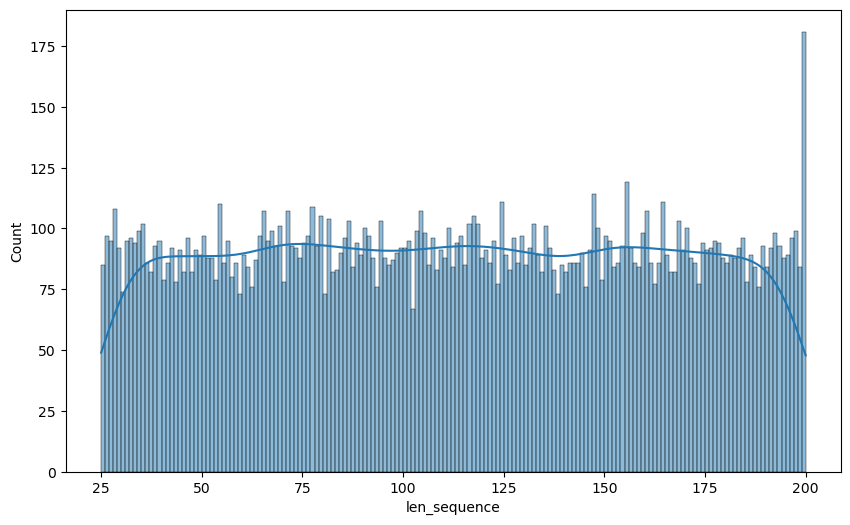

In [9]:
training_data['len_sequence'] = training_data['items'].apply(len)
print(f"Longitud mínima de secuencia: {training_data['len_sequence'].min()}")
print(f"Longitud máxima de secuencia: {training_data['len_sequence'].max()}")
print(f"Longitud promedio de secuencia: {training_data['len_sequence'].mean()}")

fig = plt.figure(figsize=(10, 6))
sns.histplot(training_data['len_sequence'], bins=175, kde=True)

Calificación mínima promedio por usuario: 1.5277777777777777
Calificación máxima promedio por usuario: 4.72
Calificación promedio promedio por usuario: 3.218076459284449


<Axes: xlabel='average_user_rating', ylabel='Count'>

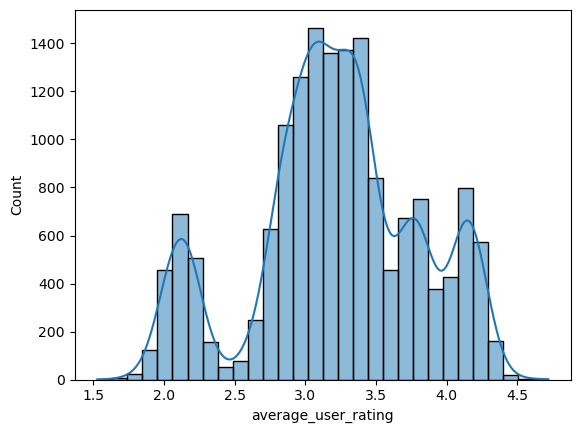

In [10]:
training_data['average_user_rating'] = training_data['ratings'].apply(lambda x: sum(x)/len(x))
print(f"Calificación mínima promedio por usuario: {training_data['average_user_rating'].min()}")
print(f"Calificación máxima promedio por usuario: {training_data['average_user_rating'].max()}")
print(f"Calificación promedio promedio por usuario: {training_data['average_user_rating'].mean()}")

sns.histplot(training_data['average_user_rating'], bins=30, kde=True)

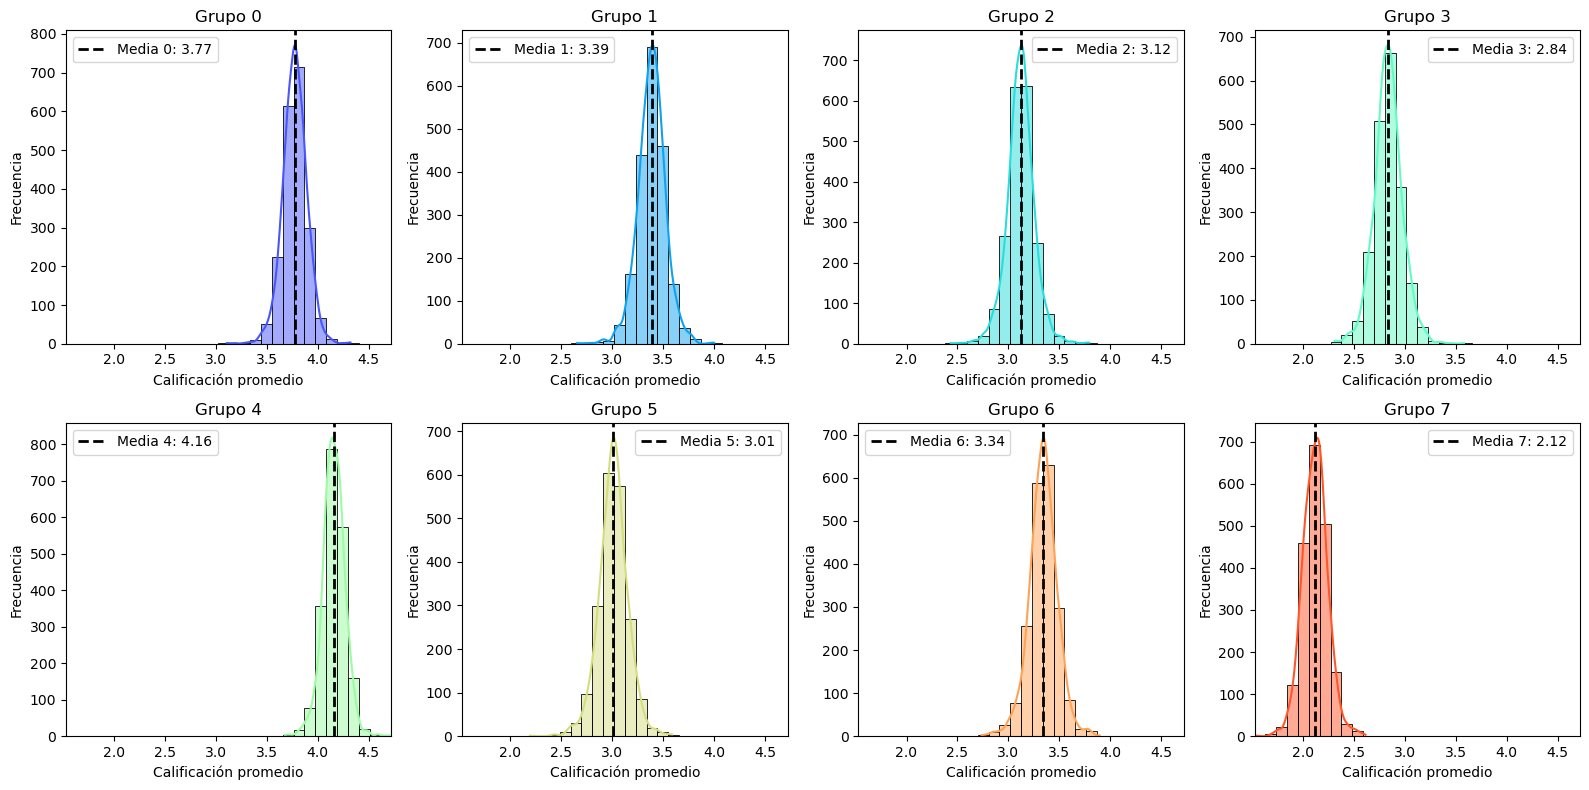

In [11]:
group_mean = training_data.groupby('user_group')['average_user_rating'].mean()
groups = sorted(training_data['user_group'].unique())
x_min, x_max = training_data['average_user_rating'].min(), training_data['average_user_rating'].max()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
palette = sns.color_palette('rainbow', len(groups))

for ax, grp, color in zip(axes.flatten(), groups, palette):
    data_grp = training_data.loc[training_data['user_group'] == grp, 'average_user_rating']
    sns.histplot(data_grp, bins=30, binrange=(x_min, x_max), kde=True, ax=ax, color=color)
    ax.axvline(group_mean[grp], color='black', linestyle='--', linewidth=2, label=f'Media {grp}: {group_mean[grp]:.2f}')
    ax.set_title(f'Grupo {int(grp)}')
    ax.set_xlabel('Calificación promedio')
    ax.set_ylabel('Frecuencia')
    ax.set_xlim(x_min, x_max)
    ax.legend()

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()

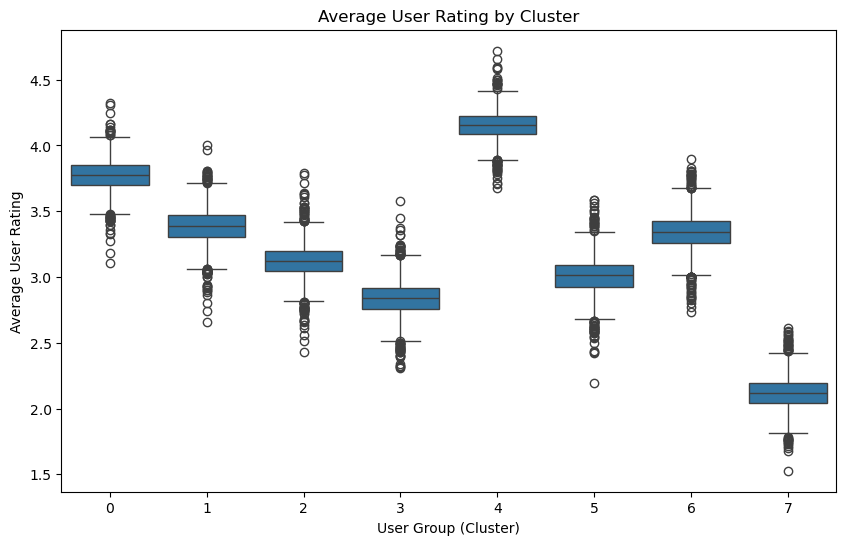

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data, x='user_group', y='average_user_rating')
plt.xlabel('User Group (Cluster)')
plt.ylabel('Average User Rating')
plt.title('Average User Rating by Cluster')
plt.show()

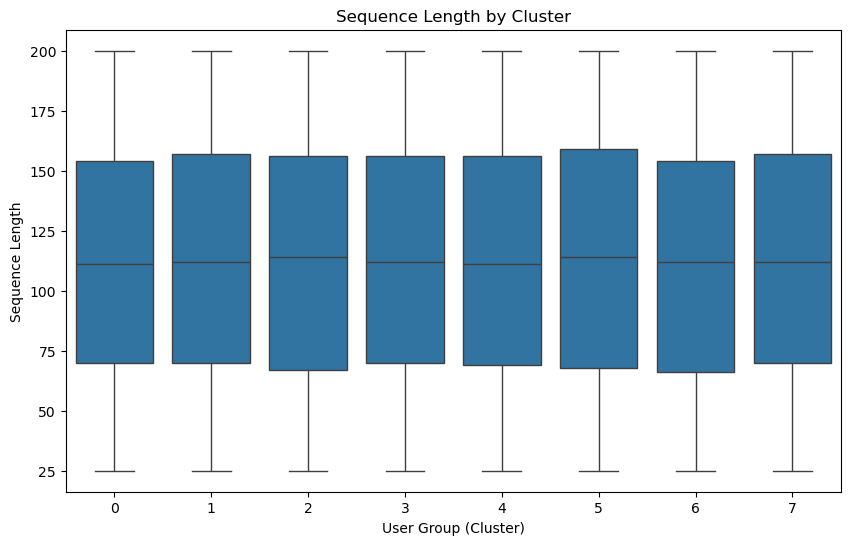

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data, x='user_group', y='len_sequence')
plt.xlabel('User Group (Cluster)')
plt.ylabel('Sequence Length')
plt.title('Sequence Length by Cluster')
plt.show()

     item_id    rating  frequency
697      101  2.287886       2237
306      317  3.441799       2268
527      462  2.839577       2269
373      515  3.272687       2270
125      124  3.811404       2280
..       ...       ...        ...
388      589  3.253487       2509
26       532  4.303187       2510
694      420  2.297932       2514
649      579  2.418669       2539
307      505  3.439811       2542

[752 rows x 3 columns]


<Axes: xlabel='rating', ylabel='Count'>

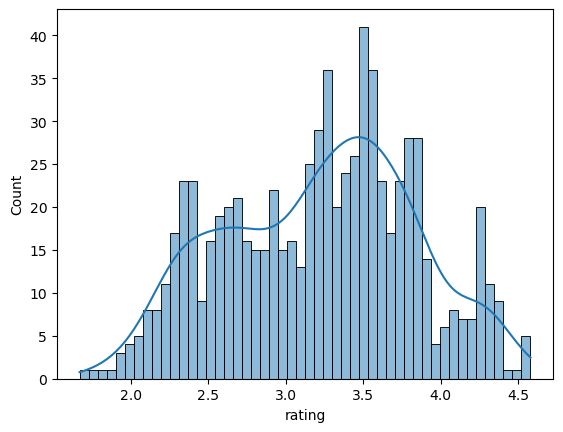

In [14]:
df_expanded = (
    training_data
    .explode(['items', 'ratings'])
    .rename(columns={'items':'item_id', 'ratings':'rating'})
)

item_mean_df = (
    df_expanded
    .groupby('item_id')['rating']
    .mean()
    .reset_index()
    .sort_values('rating', ascending=False)
)

item_freq = df_expanded['item_id'].value_counts().reset_index()
item_freq.columns = ['item_id', 'frequency']

item_mean_df = item_mean_df.merge(item_freq, on='item_id')
item_mean_df = item_mean_df.sort_values('frequency', ascending=True)

print(item_mean_df)

sns.histplot(item_mean_df['rating'], bins=50, kde=True)


Text(0.5, 1.0, 'Distribución de frecuencias de ítems')

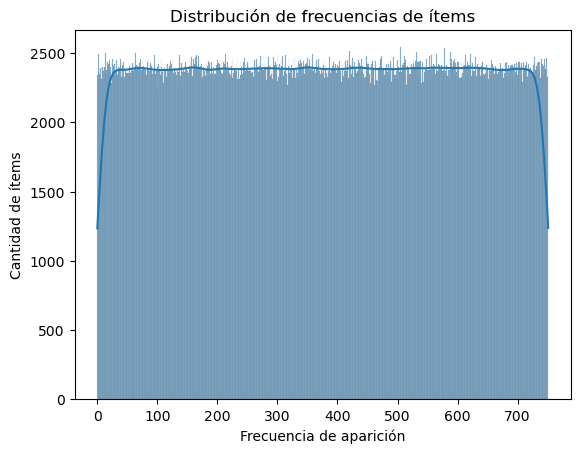

In [15]:

item_freq = df_expanded['item_id'].value_counts()
sns.histplot(df_expanded['item_id'], bins=752, kde=True)
plt.xlabel('Frecuencia de aparición')
plt.ylabel('Cantidad de ítems')
plt.title('Distribución de frecuencias de ítems')


In [16]:
item_freq.head()

item_id
505    2542
579    2539
420    2514
532    2510
589    2509
Name: count, dtype: int64

Correlación entre frecuencia y calificación promedio: -0.0324


<Axes: xlabel='frequency', ylabel='rating'>

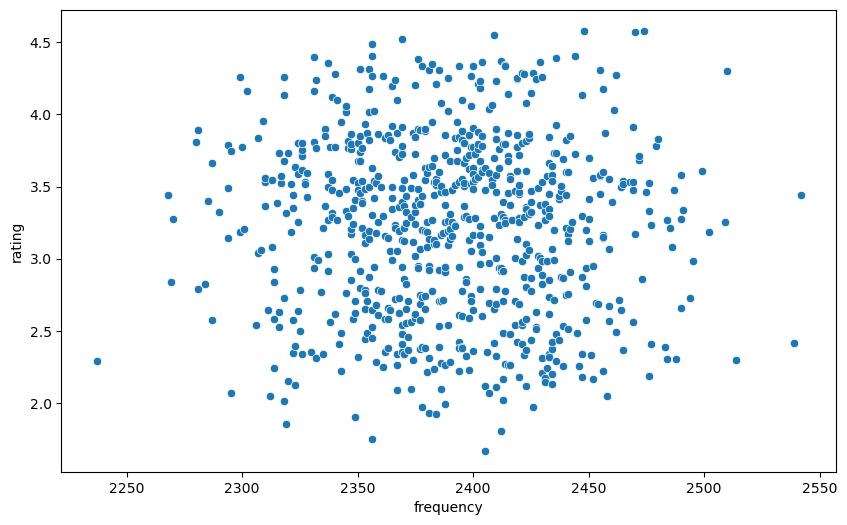

In [17]:

correlation = item_mean_df['frequency'].corr(item_mean_df['rating'])
print(f'Correlación entre frecuencia y calificación promedio: {correlation:.4f}')

df_expanded.head()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=item_mean_df, x='frequency', y='rating')

In [18]:
for group in sorted(training_data['user_group'].unique()):

    df_group = df_expanded[df_expanded['user_group'] == group]
    item_mean_group = (
        df_group
        .groupby('item_id')['rating']
        .mean()
        .reset_index()
        .sort_values('rating', ascending=False)
    )
    
    df_group_top10 = item_mean_group.head(10)
    print(f"Top 10 items para el grupo {group}:")
    print(df_group_top10)
    print("\n")

Top 10 items para el grupo 0:
     item_id    rating
60        60  4.856667
285      285  4.821429
623      623  4.800738
85        85  4.787879
609      609  4.780488
293      293   4.77931
401      401  4.760518
410      410  4.758491
201      201   4.74772
656      656  4.746082


Top 10 items para el grupo 1:
     item_id    rating
318      318  4.686469
261      261  4.684211
293      293  4.671642
285      285  4.671186
401      401  4.669811
85        85  4.663522
623      623      4.65
509      509  4.643333
152      152  4.637011
201      201  4.635514


Top 10 items para el grupo 2:
     item_id    rating
293      293  4.581994
623      623  4.521472
285      285  4.485893
144      144  4.444444
509      509   4.43686
288      288  4.436426
632      632  4.425926
514      514  4.421769
558      558  4.421233
237      237  4.418919


Top 10 items para el grupo 3:
     item_id    rating
318      318  4.467742
509      509  4.439873
85        85  4.415771
401      401  4.414343


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: >]


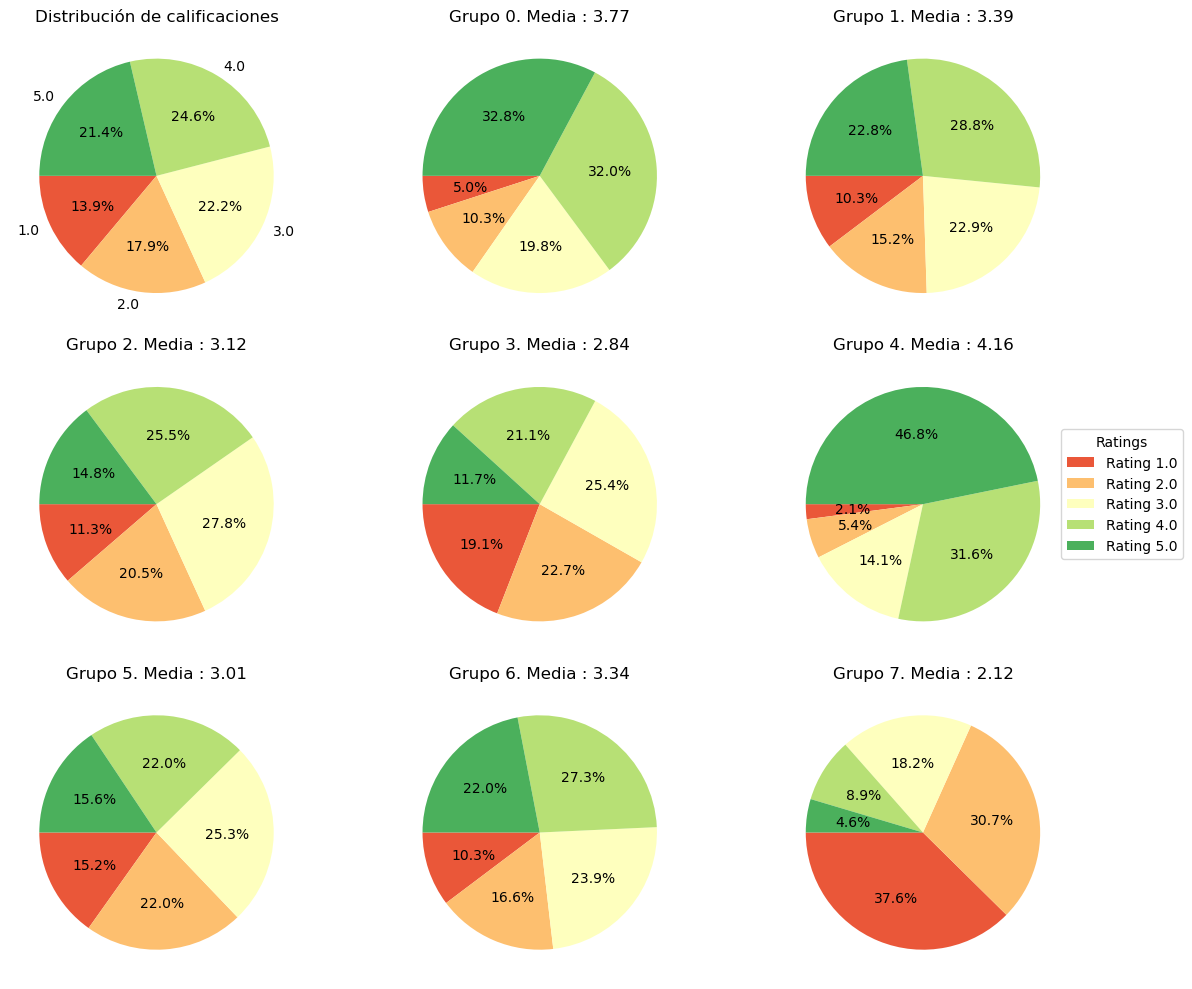

In [19]:
import matplotlib.pyplot as plt

groups = sorted(training_data['user_group'].unique())

fig, axes = plt.subplots(3, 3, figsize=(13, 10))
axes = axes.flatten()   # Para indexar fácilmente
print(axes)
colors = sns.color_palette('RdYlGn', n_colors=5)

rating_counts = df_expanded['rating'].value_counts().sort_index()
axes[0].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=180, colors=colors)
axes[0].set_title('Distribución de calificaciones')
axes[0].set_ylabel('')

axes = axes[1:]  # Usar los ejes restantes para los grupos

for ax, group in zip(axes, groups):
    df_group = df_expanded[df_expanded['user_group'] == group]
    rating_counts = df_group['rating'].value_counts().sort_index()
    
    ax.pie(rating_counts, labels=None, autopct='%1.1f%%', startangle=180, colors=colors)
    ax.set_title(f'Grupo {int(group)}. Media : {df_group["rating"].mean():.2f}')
    ax.set_ylabel('')
     

    plt.tight_layout()

unique_ratings = sorted(df_expanded['rating'].unique())
rating_to_color = dict(zip(unique_ratings, colors))

from matplotlib.patches import Patch
handles = [Patch(facecolor=rating_to_color[r]) for r in unique_ratings]
labels = [f"Rating {r}" for r in unique_ratings]

# Leyenda global afuera
fig.legend(
    handles,
    labels,
    title="Ratings",
    loc="center right",
    bbox_to_anchor=(1., 0.5)
)
plt.show()


In [20]:
# Crear tabla con estadísticas por grupo
stats_by_group = training_data.groupby('user_group')['average_user_rating'].agg([
    ('Media', 'mean'),
    ('Mediana', 'median'),
    ('Moda', lambda x: x.mode()[0] if len(x.mode()) > 0 else None),
    ('STD', 'std'),
]).round(4)

# Agregar fila de totales
total_row = pd.Series({
    'Media': training_data['average_user_rating'].mean(),
    'Mediana': training_data['average_user_rating'].median(),
    'Moda': training_data['average_user_rating'].mode()[0] if len(training_data['average_user_rating'].mode()) > 0 else None,
    'STD': training_data['average_user_rating'].std()
}, name='Total').round(4)

stats_by_group = pd.concat([stats_by_group, total_row.to_frame().T])

print(stats_by_group)

        Media  Mediana    Moda     STD
0      3.7729   3.7735  3.7500  0.1200
1      3.3864   3.3896  3.5000  0.1361
2      3.1198   3.1211  3.0000  0.1354
3      2.8384   2.8371  3.0000  0.1400
4      4.1558   4.1548  4.0000  0.1092
5      3.0099   3.0116  3.0000  0.1448
6      3.3402   3.3421  3.3333  0.1396
7      2.1213   2.1215  2.0000  0.1243
Total  3.2181   3.2222  3.0000  0.5884


## Pre-procesamiento de datos de entrenamiento

Número de trayectorias generadas: 16000
Longitud media de las trayectorias: 112.35
Longitud máxima de las trayectorias: 200
Longitud mínima de las trayectorias: 25


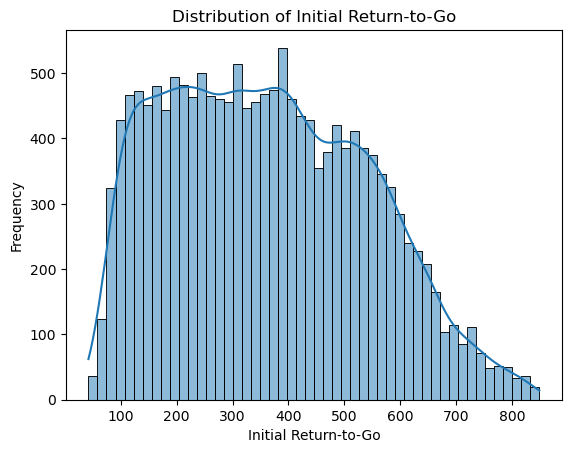

In [24]:
dt_dataset = create_dt_dataset(training_data,test=True, print_stats=True)

initial_rewards = [seq['returns_to_go'][0] for seq in dt_dataset]

sns.histplot(initial_rewards, bins=50, kde=True)
plt.xlabel('Initial Return-to-Go')
plt.ylabel('Frequency')
plt.title('Distribution of Initial Return-to-Go')
plt.show()

In [22]:
# faltan los cuartiles porque no entendi


#### Guardamos el dataset con los datos pre-procesados

In [23]:
os.makedirs('../data/processed', exist_ok=True)

with open('../data/processed/trajectories_train.pkl', 'wb') as f:
    pickle.dump(dt_dataset, f)